In [1]:
import tensorflow as tf
import keras
import matplotlib as plt
import seaborn as sb
import pandas as pd
import numpy as np
import scipy as sy
import pickle

In [87]:
file_train = open("data/training_dataset.pickle",'rb')
trainingdata = pickle.load(file_train)
train_data, train_label = trainingdata['data'], trainingdata['label']

file_validation = open("data/validation_dataset.pickle",'rb')
validationdata = pickle.load(file_validation)
valid_data, valid_label = validationdata['data'], validationdata['label']

In [99]:
# Encode labels to 0 and 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_label)
train_label = le.transform(train_label)

le.fit(valid_label)
valid_label = le.transform(valid_label)

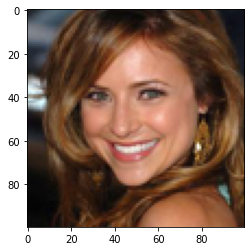

In [88]:
import matplotlib.pyplot as plt
plt.imshow(train_data[4, :, :, :])

# Converting RGB images into Grayscale

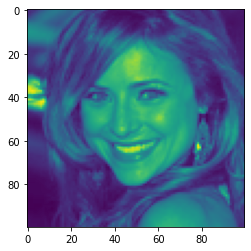

In [90]:
from skimage import color
color.rgb2gray(train_data[4, :, :, :])
plt.imshow(color.rgb2gray(train_data[4, :, :, :]))

In [91]:
train_data = color.rgb2gray(train_data)

In [92]:
valid_data = color.rgb2gray(valid_data)

# Augmenting Image Data

In [93]:
from keras.preprocessing.image import ImageDataGenerator

In [95]:
# Adding 4th dimension to train data
train_data = np.expand_dims(train_data, -1)
print(train_data.shape)

(11135, 100, 100, 1)


In [96]:
# Adding 4th dimension to validation data
valid_data = np.expand_dims(valid_data, -1)
print(valid_data.shape)

(1279, 100, 100, 1)


In [97]:
datagen = ImageDataGenerator(rotation_range=90, fill_mode="nearest")
datagen.fit(train_data)


In [ ]:
# Train Grayscale Model WITHOUT data augmentation and tanh as 

## Model with tanh

In [107]:
# create a sequential model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Input((100,100,1)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='tanh'))

In [108]:
# Training the network
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
model.fit(x = train_data, y = train_label, batch_size = 64, epochs = 20)
test_loss, test_acc = model.evaluate(x = valid_data, y = valid_label)

Epoch 1/20
174/174 [==============================] - 35s 198ms/step - loss: 0.6514 - accuracy: 0.6298
Epoch 2/20
174/174 [==============================] - 34s 196ms/step - loss: 0.5225 - accuracy: 0.7442
Epoch 3/20
174/174 [==============================] - 34s 197ms/step - loss: 0.4621 - accuracy: 0.7957
Epoch 4/20
174/174 [==============================] - 35s 203ms/step - loss: 0.4103 - accuracy: 0.8281
Epoch 5/20
174/174 [==============================] - 33s 192ms/step - loss: 0.3775 - accuracy: 0.8497
Epoch 6/20
174/174 [==============================] - 35s 199ms/step - loss: 0.3371 - accuracy: 0.8633
Epoch 7/20
174/174 [==============================] - 37s 213ms/step - loss: 0.3255 - accuracy: 0.8746
Epoch 8/20
174/174 [==============================] - 33s 188ms/step - loss: 0.2917 - accuracy: 0.8879
Epoch 9/20
174/174 [==============================] - 33s 187ms/step - loss: 0.2666 - accuracy: 0.8960
Epoch 10/20
174/174 [==============================] - 35s 202ms/step - l

In [109]:
test_acc

0.8772478699684143

## Model with Sigmoid and Increasing Filters

In [122]:
# create a sequential model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Input((100,100,1)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [123]:
# Training the network
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
model.fit(x = train_data, y = train_label, batch_size = 64, epochs = 20)
test_loss, test_acc = model.evaluate(x = valid_data, y = valid_label)

Epoch 1/20
174/174 [==============================] - 40s 225ms/step - loss: 0.5893 - accuracy: 0.6842
Epoch 2/20
174/174 [==============================] - 35s 201ms/step - loss: 0.4635 - accuracy: 0.7881
Epoch 3/20
174/174 [==============================] - 36s 204ms/step - loss: 0.3949 - accuracy: 0.8219
Epoch 4/20
174/174 [==============================] - 37s 215ms/step - loss: 0.3461 - accuracy: 0.8505
Epoch 5/20
174/174 [==============================] - 37s 210ms/step - loss: 0.3042 - accuracy: 0.8728
Epoch 6/20
174/174 [==============================] - 37s 211ms/step - loss: 0.2674 - accuracy: 0.8901
Epoch 7/20
174/174 [==============================] - 38s 220ms/step - loss: 0.2430 - accuracy: 0.8991
Epoch 8/20
174/174 [==============================] - 37s 212ms/step - loss: 0.2151 - accuracy: 0.9114
Epoch 9/20
174/174 [==============================] - 37s 213ms/step - loss: 0.1917 - accuracy: 0.9245
Epoch 10/20
174/174 [==============================] - 37s 210ms/step - l

## Same as above but with RGB images

In [127]:
file_train = open("data/training_dataset.pickle",'rb')
trainingdata = pickle.load(file_train)
train_data, train_label = trainingdata['data'], trainingdata['label']

file_validation = open("data/validation_dataset.pickle",'rb')
validationdata = pickle.load(file_validation)
valid_data, valid_label = validationdata['data'], validationdata['label']

In [128]:
# Encode labels to 0 and 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_label)
train_label = le.transform(train_label)

le.fit(valid_label)
valid_label = le.transform(valid_label)

In [131]:
# create a sequential model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Input((100,100,3)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [132]:
# Training the network
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
model.fit(x = train_data, y = train_label, batch_size = 64, epochs = 20)
test_loss, test_acc = model.evaluate(x = valid_data, y = valid_label)

Epoch 1/20
174/174 [==============================] - 43s 246ms/step - loss: 0.5643 - accuracy: 0.7012
Epoch 2/20
174/174 [==============================] - 41s 238ms/step - loss: 0.4226 - accuracy: 0.8057
Epoch 3/20
174/174 [==============================] - 41s 237ms/step - loss: 0.3337 - accuracy: 0.8556
Epoch 4/20
174/174 [==============================] - 42s 240ms/step - loss: 0.2830 - accuracy: 0.8803
Epoch 5/20
174/174 [==============================] - 41s 238ms/step - loss: 0.2439 - accuracy: 0.8981
Epoch 6/20
174/174 [==============================] - 42s 239ms/step - loss: 0.2178 - accuracy: 0.9084
Epoch 7/20
174/174 [==============================] - 41s 238ms/step - loss: 0.1915 - accuracy: 0.9225
Epoch 8/20
174/174 [==============================] - 43s 245ms/step - loss: 0.1720 - accuracy: 0.9326
Epoch 9/20
174/174 [==============================] - 43s 248ms/step - loss: 0.1503 - accuracy: 0.9417
Epoch 10/20
174/174 [==============================] - 40s 230ms/step - l

In [133]:
file_train = open("data/training_dataset.pickle",'rb')
trainingdata = pickle.load(file_train)
train_data, train_label = trainingdata['data'], trainingdata['label']

file_validation = open("data/validation_dataset.pickle",'rb')
validationdata = pickle.load(file_validation)
valid_data, valid_label = validationdata['data'], validationdata['label']

In [134]:
# Encode labels to 0 and 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_label)
train_label = le.transform(train_label)

le.fit(valid_label)
valid_label = le.transform(valid_label)

In [140]:
# create a sequential model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Input((100,100,3)))
model.add(tf.keras.layers.Conv2D(8, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [141]:
# Training the network
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
model.fit(x = train_data, y = train_label, batch_size = 64, epochs = 20)
test_loss, test_acc = model.evaluate(x = valid_data, y = valid_label)

Epoch 1/20
174/174 [==============================] - 34s 193ms/step - loss: 0.5620 - accuracy: 0.7075
Epoch 2/20
174/174 [==============================] - 34s 194ms/step - loss: 0.4161 - accuracy: 0.8123
Epoch 3/20
174/174 [==============================] - 33s 187ms/step - loss: 0.3391 - accuracy: 0.8542
Epoch 4/20
174/174 [==============================] - 33s 191ms/step - loss: 0.3012 - accuracy: 0.8712
Epoch 5/20
174/174 [==============================] - 33s 190ms/step - loss: 0.2709 - accuracy: 0.8880
Epoch 6/20
174/174 [==============================] - 32s 184ms/step - loss: 0.2500 - accuracy: 0.8983
Epoch 7/20
174/174 [==============================] - 32s 183ms/step - loss: 0.2288 - accuracy: 0.9081
Epoch 8/20
174/174 [==============================] - 32s 184ms/step - loss: 0.2129 - accuracy: 0.9146
Epoch 9/20
174/174 [==============================] - 32s 184ms/step - loss: 0.1998 - accuracy: 0.9192
Epoch 10/20
174/174 [==============================] - 32s 185ms/step - l